# Task 7: Conceptual Questions

Ques.1. What is the difference between Bagging and Boosting?

Ans.1. 

| Aspect             |   Bagging                                                  |   Boosting                                                   |
| ------------------ | ---------------------------------------------------------- | ------------------------------------------------------------ |
| Purpose            | Reduces variance                                           | Reduces bias and variance                                    |
| Technique          | Trains models independently in parallel                    | Trains models sequentially, each correcting the previous     |
| Data Sampling      | Uses bootstrapped (random) samples                         | Uses weighted data based on previous errors                  |
| Final Prediction   | Majority vote (classification) or average (regression)     | Weighted vote based on model accuracy                        |
| Example Algorithms | Random Forest                                              | AdaBoost, Gradient Boosting                                  |


Ques.2. How does Random Forest reduce variance?

Ans.2. Random Forest reduces variance by training multiple decision trees on different random subsets of the data and features (bagging). The final prediction is made by averaging (for regression) or majority voting (for classification), which smoothens out individual tree fluctuations, reducing overfitting and thereby lowering the model's variance.

Ques.3. What is the weakness of boosting-based methods?

Ans.3.

The main weaknesses of boosting methods are:

  1. Sensitivity to noisy data and outliers: Since boosting focuses on correcting errors, it may overfit to noisy samples.
  2. Longer training time: Models are built sequentially, so it's computationally more expensive.
  3. Complexity: Harder to tune and interpret compared to bagging methods.

# Task 8: Random Forest vs Decision Tree

C:\Users\adity\AppData\Local\Temp\ipykernel_7044\4207488572.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_7044\4207488572.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = le_sex.fit_transform(df['sex'])
C:\Users\adity\AppData\Local\Temp\ipykernel_7044\4207488572.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata


Decision Tree Metrics:
Accuracy : 0.7512
Precision: 0.7162
Recall   : 0.631

Random Forest Metrics:
Accuracy : 0.7799
Precision: 0.8065
Recall   : 0.5952


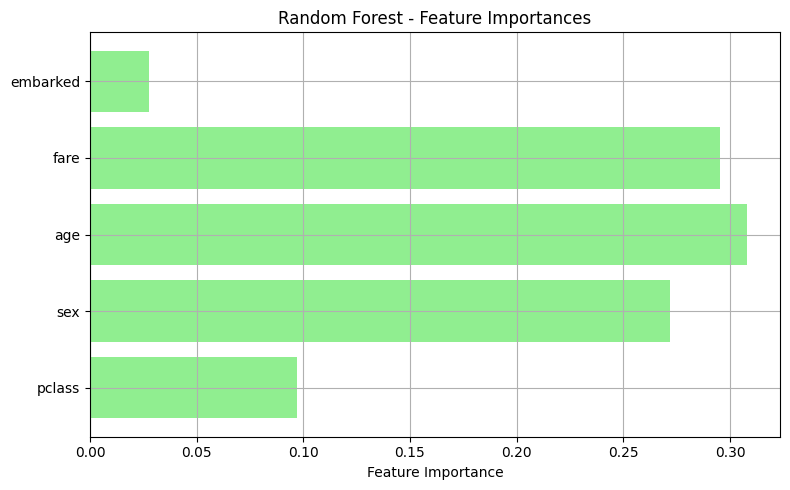

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

titanic = fetch_openml('titanic', version=1, as_frame=True)
df = titanic.frame

df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
df.dropna(inplace=True)

le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])
df['embarked'] = le_embarked.fit_transform(df['embarked'])

X = df.drop('survived', axis=1)
y = df['survived'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Metrics:")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall   :", round(recall_score(y_true, y_pred), 4))

evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)

importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='lightgreen')
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importances")
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 9: AdaBoost or Gradient Boosting

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import time

iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    duration = end - start

    print(f"\n{name} Performance:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"F1-Score  : {f1:.4f}")
    print(f"Train Time: {duration:.4f} sec")

evaluate_model("Decision Tree", DecisionTreeClassifier(random_state=42), X_train, X_test, y_train, y_test)
evaluate_model("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)


Decision Tree Performance:
Accuracy  : 1.0000
F1-Score  : 1.0000
Train Time: 0.0025 sec

Random Forest Performance:
Accuracy  : 1.0000
F1-Score  : 1.0000
Train Time: 0.1287 sec


<div align="center">

<h2>Thank You!</h2>

</div>
